1. [Polishing plots](#1)
2. [Creating a Slide Deck with Jupyter](#2)
3. [Getting feedback](#3)

<a id = '1'></a>
## Polishing plots

Thus far in the course, the code you've seen has been fairly bare-bones, just enough to get your plots created. In order to convey your findings to others quickly and efficiently, you'll need to put work into polishing your plots. There are many dimensions to consider when putting together a polished plot.

###  Choose an appropriate plot
Your choice of plot will depend on **the number of variables** that you have and their **types: nominal, ordinal, discrete numeric, or continuous.** 

Choice of plot also depends on the **specific relationship that you want to convey**. For example, whether you choose a violin plot, box plot, or adapted bar chart depends on how much data you have and whether distributions are significant or important. You'll be more likely to use a violin plot if you have a lot of data and the distributions are meaningful, and more inclined to use a box plot or bar chart if you have less data, or the distributions are less reliable.

### Choose appropriate encodings
Your variables should impact not just the type of plot that is chosen, but also the variable encodings. For example, if you have three numeric variables, you shouldn't just assign x-position, y-position, and color encodings randomly. 

In many cases, **the two variables that are most important should take the positional encodings**; if one represents an outcome or dependent variable, then it should be plotted on the y-axis. In other cases, it makes sense to plot the dependent measure with color, as though you are taking a top-down view of the plane defined by the two independent measures plotted on the axes.

### Pay attention to design integrity
When setting up your plotting parameters, remember the design principles from earlier in the course.

Make sure that you **minimize chart junk and maximize the data-ink ratio**, as far as it maintains good interpretability of the data. When deciding whether or not to add non-positional encodings, make sure that they are meaningful. For example, using color in a frequency bar chart may not be necessary on its own, but will be useful if those colors are used again later in the same presentation, matched with their original groups. By the same token, avoid using the same color scheme for different variables to minimize the chance of reader confusion.

You should also ensure that your plot **avoids lie factors** as much as possible. If you have a **bar chart or histogram, it is best to anchor them to a 0 baseline**. If you're employing **a scale transformation**, **signal this clearly in the title, axis labels, and tick marks.**

### Label axes and choose appropriate tick marks
For your positional axes, make sure you include axis labels. This is less important in exploration when you have the code available and have an extended flow to your work, but when you're conveying only the key pieces to others, it's crucial. When you add an axis label, make sure you also provide the units of measurement, if applicable (e.g., stating "Height (cm)" rather than just "Height").

As for tick marks, **you should include at least three tick marks on each axis.** This is especially important for data that has been transformed: you want enough tick marks so that the scale of the data can be communicated there. If your values are very large or very small numbers, consider using abbreviations to relabel the ticks (e.g., use "250K" instead of "250000").

### Provide legends for non-positional variables
Make sure that you add a legend for variables not depicted on the axes of your plot. For color encoding, you can add a color bar to the side of the plot. The most important new thing here is that you provide a descriptive label to your legend or color bar, just as you would the axes of your plot.

### Title your plot and include descriptive comments
Finally, make sure that you provide a descriptive title to your plot. If this is a key plot that presents important findings to others, aim to create a title that draws attention to those main points, rather than just state what variables are plotted.

Also, realize that while a visualization might be the core mechanism by which you convey findings, it need not stand alone. Comments in the text below or surrounding the plot can provide valuable context to help the reader understand your message, or reinforce the main points that they should have gotten.
Using Matplotlib to Polish Plots

Back in the univariate plots lesson, you were introduced to the general way that visualizations are structured in matplotlib and seaborn: each visualization is based off a single Figure, which contains one or more Axes, and each Axes houses elements like points, lines, and boxes that depict the plotted data. Understanding and making use of this structure will open up your ability to polish your visualizations. Each function below is linked to its documentation page and which object type it is associated with.

- figure (Figure): Used to create a new figure. You'll use this first to initialize the figure, most often using the "figsize" parameter to set the figure dimensions.
- xlabel and ylabel (Axes): Used for setting axis labels.
- xticks and yticks (Axes): Used for setting tick marks.
- legend (Axes): Used to create and customize a legend. One key parameter to use is "title", which allows you to label what feature is being depicted in the legend. You might also need to make use of the "loc" and "ncol" parameters to move and shape the legend if it gets placed in an awkward location by default.
- colorbar (Axes): Used to add a colorbar to a plot. Use the "label" parameter to set the label on a colorbar.
- title (Axes): Used for setting axis titles.
- suptitle (Figure): Used for setting figure titles. The main difference between suptitle and title is that the former sets a title for the Figure as a whole, and the latter for only a single Axes. This is an important distinction: if you're using faceting or subplotting, you'll want to use suptitle to set a title for the figure as a whole.

All of the functions above, or parameters associated with those functions in the case of seaborn, have been used sporadically throughout the course. Below are a couple examples of these polishing functions in use.

This example makes use of the fuel economy dataset. Since a colorbar is being added to the plot, figsize is used to make the figure a little bit wider than normal. Title, axes, and colorbar are all labeled. Note how the units of each feature being plotted is given in parentheses in each label.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

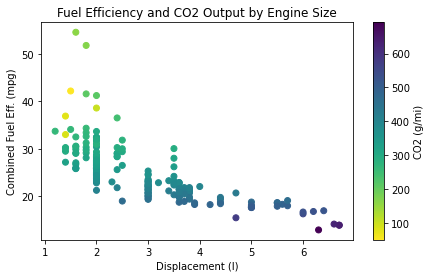

In [4]:
# loading in the data, sampling to reduce points plotted
fuel_econ = pd.read_csv('fuel-econ.csv')

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
            cmap = 'viridis_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

**Task**: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokémon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from [Pokémon Wiki Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates).)

In [5]:
pokemon = pd.read_csv('pokemon.csv')

In [6]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [13]:
# data processing: isolate only fairy and dragon type Pokemon
type_col = ['type_1','type_2']
non_type_col = pokemon.columns.difference(type_col)
pokemon_types = pd.melt(pokemon, id_vars = non_type_col, value_vars = type_col, 
                        var_name = 'type_level', value_name = 'type').dropna()

In [14]:
pkmn_subset = pokemon_types.query('type in ["fairy","dragon"]')

In [15]:
pkmn_subset.type.value_counts()

fairy     47
dragon    45
Name: type, dtype: int64

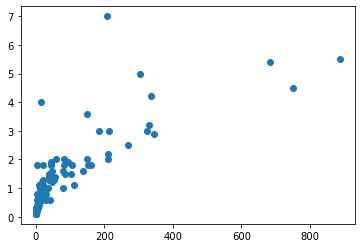

In [16]:
plt.scatter(data = pkmn_subset, x = 'weight', y = 'height');

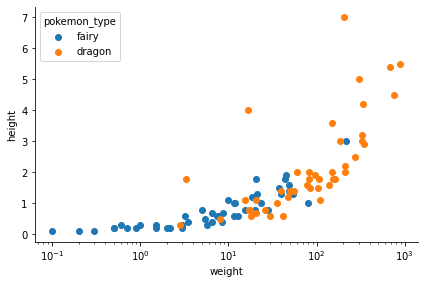

In [21]:
g = sns.FacetGrid(data = pkmn_subset, hue = 'type', size = 4, aspect = 1.5);
g.map(plt.scatter, 'weight', 'height');
plt.xscale('log') # sns.set(xscale = log)
plt.legend(title = 'pokemon_type');

---
<a id = '2'></a>
## Creating a Slide Deck with Jupyter

There are many ways in which you can use explanatory visualizations to convey findings to others. You might save your plots on their own, and embed them in a report or blog post. Visualizations also have a major place in presentations, as part of a slide deck. When it comes to creating slides, you might normally think of dedicated tools like Powerpoint, Keynote, or Google Slides. What you might not be aware of is the fact that Jupyter notebooks include a tool, [nbconvert](https://nbconvert.readthedocs.io/en/latest/), that can export notebooks in an HTML slides format. The video below demonstrates a walkthrough of this:



If you're planning on creating a slide deck presentation through a Jupyter notebook, it's a good idea to create a new notebook that is separate from your original, exploratory, work. This way, your explanatory work will be focused, and there will be fewer elements to categorize. To start, you need to categorize the type of slide element that each cell will correspond with. 

**From the menu bar, select View > Cell Toolbar > Slideshow.** You'll see a drop down appear in the upper right hand corner of each cell, from which you can assign slide element types.

For cells that you want readers to see, you'll choose the Slide, Sub-Slide, or Fragment types. Slides will form the main flow of the presentation, while sub-slides are children of slides in the main flow. Fragments are attached to preceding slides or sub-slides, and allow for gradual reveals of information on the same slide. It's a little hard to describe this abstractly through text: you can see an example of Slides, Sub-Slides, and Fragments at work through the example presentation found on the reveal.js homepage (the library that is behind the nbconvert slide functionality).

Cells that you don't want users to see should be in the Skip or Notes types. Skip-type cells will never show up in a slide flow, while Notes cells can only be seen by the presenter in a speaker notes window.

In addition to setting slide types, make sure that all of your code cells have been run and produce the output that you want to show. nbconvert will only export elements of the notebook as-is, and won't run the notebook cells as is. It is recommended that you use the **Kernel > Restart & Run All** menu option to do a clean run-through of all of your cells as a final preparatory action.

Once your notebook has been prepared, save it and shut down your notebook server. On the command line, you can render the notebook as slides using the following expression as a base.

>jupyter nbconvert presentation.ipynb --to slides

However, it's likely that you'll want to add additional options to the nbconvert call to make the slides look cleaner and to make serving them easier.

By default, code cell inputs and outputs are both rendered in the slides. More likely than not, you'll want to hide the code in your presentation so that all attention can be put on the visualizations and text. To do this, you can specify a template file using the **`--template`** option. The template file available at this link and in the Resources at the bottom of this page, will hide code cells from nbconvert.

Additionally, running the base expression will not automatically open up the slide deck for viewing. In order to serve the slides, you would need to install a local copy of reveal.js ([Installation documentation](https://github.com/hakimel/reveal.js#installation)), make sure that your HTML slides point to the library correctly (using the **`--reveal-prefix option`**), and then start a local http server (e.g., via **`python -m http.server`**). Alternatively, you can add the **`--post serve`** option to your expression to make use of a public, online version of **`reveal.js`**, start up a server, and immediately open a tab in your web browser with the slide deck ready to navigate.

If you're at home with HTML, css, and web engine templating, then you have a lot of potential room for customizing your slide deck work. Otherwise, you can just use an expression like the following to get a basic slide deck up and running.

>jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl
--post serve

---
<a id = '3'></a>
## Getting and Using Feedback
When putting together a report or presentation to communicate results to others, it never hurts to get outside eyes on your work to make sure that your findings are conveyed clearly. Asking colleagues, friends, or family to provide feedback can be a good step to making sure that the story that you wish to tell hits its mark.

When you present your work to the reader, let them go through the work for themselves first. Then, follow up with them to check whether or not their conclusions match what you were hoping to convey. The following questions might be good starters; be sure to follow up or come up with your own questions:

- What do you notice about each visualization?
- What questions do you have about the data?
- What relationships do you notice?
- What do you think is the main takeaway from the report / presentation?
- Is there anything that you don’t understand from the plots?

Use the feedback that you get from your reader to iterate on and improve on your designs. The alternative perspective that they have may reveal things that you didn't consider or points that require further clarification.